In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [8]:
def create_train_val_dirs(root_path):
    train_dir = os.path.join(root_path, "training")
    validation_dir = os.path.join(root_path, "validation")
    
    training_cats_dir = os.path.join(train_dir, "cats")
    training_dogs_dir = os.path.join(train_dir, "dogs")
    
    validations_cats_dir = os.path.join(validation_dir, "cats")
    validations_dogs_dir = os.path.join(validation_dir, "dogs")
    
    os.makedirs(training_cats_dir)
    os.makedirs(training_dogs_dir)
    os.makedirs(validations_cats_dir)
    os.makedirs(validations_dogs_dir)
    
    train_cat_dir = os.listdir(training_cats_dir)
    train_dog_dir = os.listdir(training_dogs_dir)

In [16]:
def split_data(source_dir, training_dir, validation_dir, split_size):
    
    stripped_names = os.listdir(source_dir)
    
    for name in os.listdir(source_dir):
        if os.path.getsize(source_dir +'/'+name) == 0:
            print(name + " is zero length, so ignoring.")
            stripped_names.remove(name)
    
    shuff_names = random.sample(stripped_names, len(stripped_names))
    
    for name in shuff_names[:int(len(stripped_names)*split_size)]:
        copyfile(source_dir + name, training_dir + name)
    
    for name in shuff_names[int(len(stripped_names)*split_size):]:
        copyfile(source_dir + name, validation_dir + name)

In [10]:
def train_val_generators(training_dir, validation_dir):
    
    train_datagen = ImageDataGenerator(rescale=(1./255))
    
    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))
    
    validation_datagen = ImageDataGenerator(rescale=(1./255))
    
    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=20,
                                                                  class_mode='binary',
                                                                  target_size=(150,150))
    
    return train_generator, validation_generator

In [11]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
root_dir = "C:/NURE/OI/Lab-3/assets/cats-vs-dogs"

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

In [14]:
source_path = "C:/NURE/OI/Lab-3/assets/cats-and-dogs/PetImages/"

source_path_dogs = os.path.join(source_path, "Dog/")
source_path_cats = os.path.join(source_path, "Cat/")

print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [12]:
create_train_val_dirs(root_dir)

In [17]:
training_dir_dog = "C:/NURE/OI/Lab-3/assets/cats-vs-dogs/training/dogs/"
training_dir_cat = "C:/NURE/OI/Lab-3/assets/training/cats/"

validation_dir_dog = "C:/NURE/OI/Lab-3/assets/validation/dogs/"
validation_dir_cat = "C:/NURE/OI/Lab-3/assets/validation/cats/"

split_data(source_path_dogs, training_dir_dog, validation_dir_dog, split_size=0.9)
split_data(source_path_cats, training_dir_cat, validation_dir_cat, split_size=0.9)

11702.jpg is zero length, so ignoring.
666.jpg is zero length, so ignoring.


In [18]:
training_dir = "C:/NURE/OI/Lab-3/assets/cats-vs-dogs/training/"
validation_dir = "C:/NURE/OI/Lab-3/assets/cats-vs-dogs/validation/"
train_generator, validation_generator = train_val_generators(training_dir=training_dir, validation_dir=validation_dir)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [21]:
model = create_model()

history = model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator)

Epoch 1/15
 867/1125 [======================>.......] - ETA: 1:23 - loss: 0.6575 - accuracy: 0.5974

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1125/1125 [==============================] - 380s 337ms/step - loss: 0.6345 - accuracy: 0.6256 - val_loss: 0.5228 - val_accuracy: 0.7452
Epoch 2/15
1125/1125 [==============================] - 382s 340ms/step - loss: 0.4772 - accuracy: 0.7717 - val_loss: 0.4275 - val_accuracy: 0.7980
Epoch 3/15
1125/1125 [==============================] - 378s 336ms/step - loss: 0.3896 - accuracy: 0.8233 - val_loss: 0.3744 - val_accuracy: 0.8324
Epoch 4/15
1125/1125 [==============================] - 402s 357ms/step - loss: 0.3287 - accuracy: 0.8561 - val_loss: 0.3383 - val_accuracy: 0.8516
Epoch 5/15
1125/1125 [==============================] - 417s 370ms/step - loss: 0.2640 - accuracy: 0.8876 - val_loss: 0.3633 - val_accuracy: 0.8404
Epoch 6/15
1125/1125 [==============================] - 378s 336ms/step - loss: 0.2068 - accuracy: 0.9141 - val_loss: 0.3641 - val_accuracy: 0.8528
Epoch 7/15
1125/1125 [==============================] - 373s 332ms/step - loss: 0.1604 - accuracy: 0.9337 - val_loss: 0.353

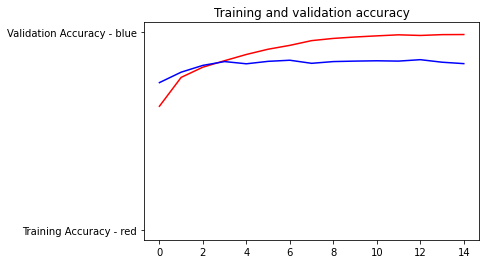

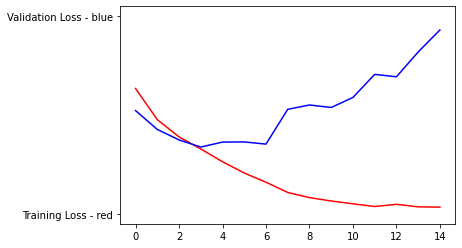

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy - red")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy - blue")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss - red")
plt.plot(epochs, val_loss, 'b', "Validation Loss - blue")
plt.title('Training and validation loss')
plt.show()